In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import snap

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

%matplotlib inline

In [2]:
# data import
features = pd.read_csv('data/test-3/hashtag_network.emb', sep=' ',header=None,skiprows=1)
nodes = pd.read_csv('data/test-3/hashtag_network_nodes.csv', sep='\t')

/home/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = nodes.merge(features, left_on='id', right_on=0)

In [4]:
tags = data[data['type'] == 'tag']
tags.drop(['type',0], axis=1, inplace=True)

/home/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [5]:
tags.head()

,id,content,id_node,1,2,3,4,5,6,7,8
224698,224700,australianbrand,australianbrand,-0.180459,-0.316613,-1.054670,-0.132083,-0.951304,2.85555,-0.491275,0.171838
224699,224701,wanderlust,wanderlust,0.114798,-0.542545,-0.877943,-0.210757,-0.282664,2.20002,-0.619565,0.385653
224700,224702,turquoise,turquoise,-0.187237,-0.356823,-0.704260,-0.267129,-0.680272,2.42063,-0.484453,0.255284
224701,224703,colour,colour,-0.088906,-0.256796,-0.566659,-0.556371,-0.613045,2.25033,-0.449032,0.139784
224702,224704,lifestyle,lifestyle,-0.689276,-0.427289,-0.932041,-0.565373,-0.621460,2.17056,-0.488679,0.467463


In [6]:
tags.drop(['id','content'], axis=1, inplace=True)

In [7]:
tags.shape

(1692, 9)

### Analysis of data points density to select parameters for DBSCAN

In [8]:
distMatrix = squareform(pdist(tags[range(1,9)]))

In [9]:
def getKgraph(dist_matrix, k):
    k_graph = []
    for i in range(tags.shape[0]):
        knn_dist = np.mean(sorted(distMatrix[i])[1:K+1])
        k_graph.append(knn_dist)
    return k_graph

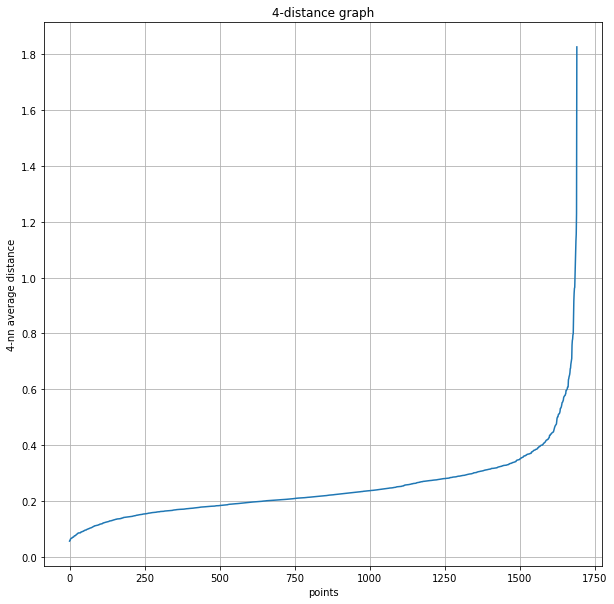

In [10]:
K = 4
k_graph = getKgraph(distMatrix, K)

plt.figure(figsize=(10,10))
plt.title('{}-distance graph'.format(K))
plt.xlabel('points')
plt.ylabel('{}-nn average distance'.format(K))

plt.plot(sorted(k_graph))
plt.yticks(np.arange(0, max(k_graph), step=0.2))
plt.grid(True)

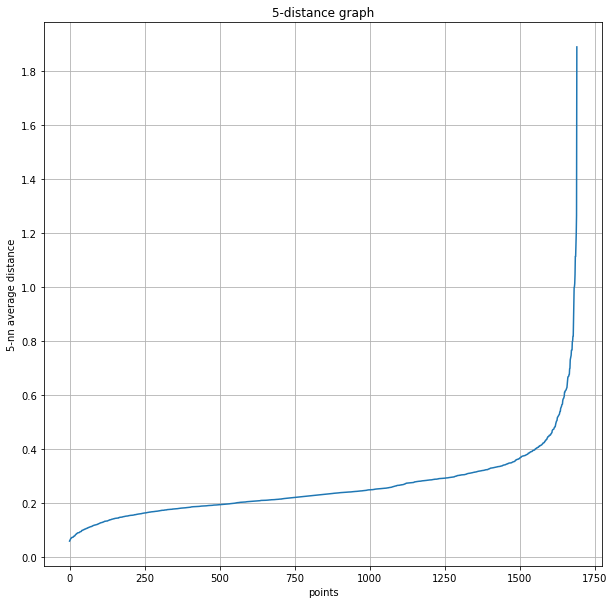

In [11]:
K = 5
k_graph = getKgraph(distMatrix, K)

plt.figure(figsize=(10,10))
plt.title('{}-distance graph'.format(K))
plt.xlabel('points')
plt.ylabel('{}-nn average distance'.format(K))

plt.plot(sorted(k_graph))
plt.yticks(np.arange(0, max(k_graph), step=0.2))
plt.grid(True)

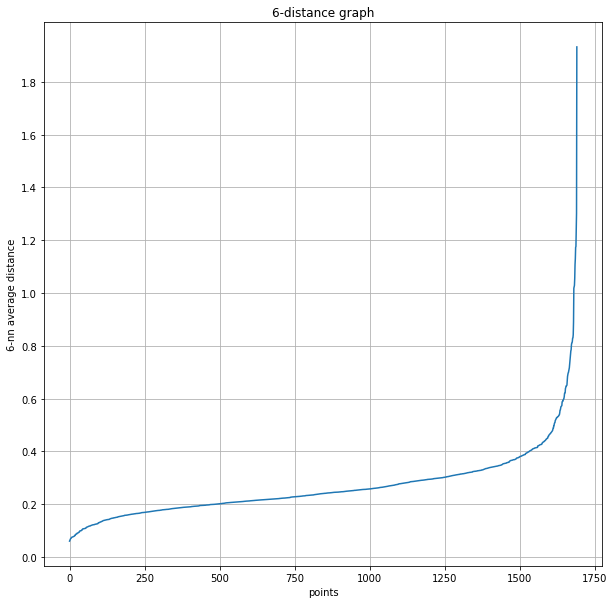

In [12]:
K = 6
k_graph = getKgraph(distMatrix, K)

plt.figure(figsize=(10,10))
plt.title('{}-distance graph'.format(K))
plt.xlabel('points')
plt.ylabel('{}-nn average distance'.format(K))

plt.plot(sorted(k_graph))
plt.yticks(np.arange(0, max(k_graph), step=0.2))
plt.grid(True)

### DBSCAN

In [58]:
epsilon = 0.3
minPts = 5
db = DBSCAN(eps = epsilon, min_samples = minPts, n_jobs = -1).fit(tags[range(1,9)])

In [59]:
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print 'Estimated number of clusters: {}'.format(n_clusters)

Estimated number of clusters: 24


In [78]:
tags['cluster'] = labels
tags.to_csv('output/test-3/tagsdata.csv', index=None)

/home/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


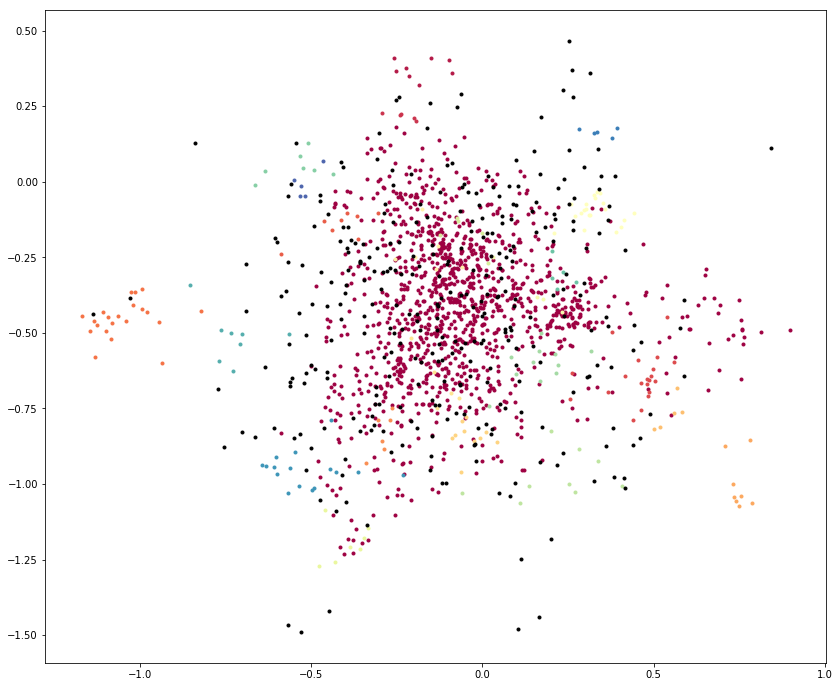

In [79]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(14,12))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    
    cluster = tags[tags['cluster'] == k]
    plt.scatter(cluster[1], cluster[2], marker='.', color=col)

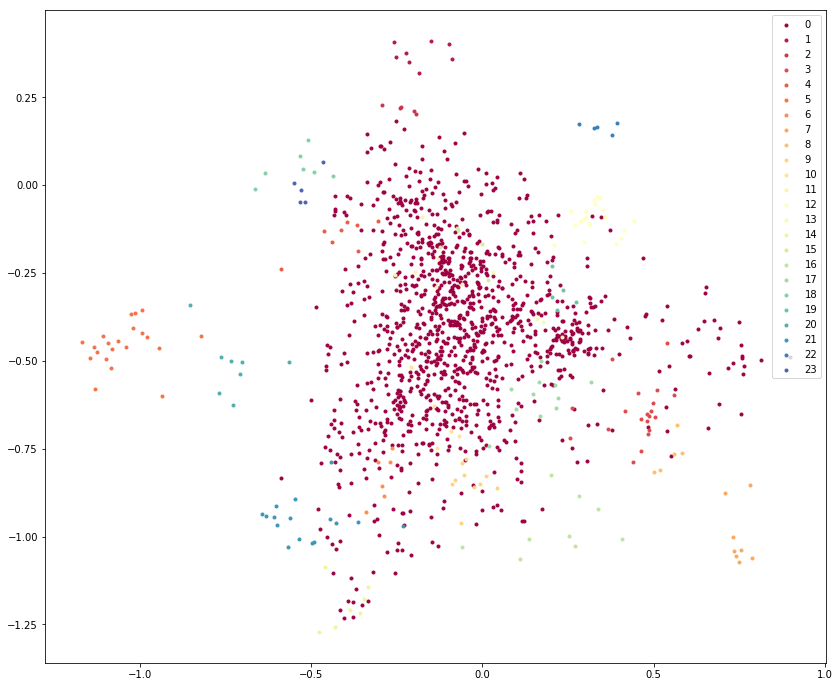

In [62]:
plt.figure(figsize=(14,12))
for k, col in zip(unique_labels, colors):
    if k != -1:
        cluster = tags[tags['cluster'] == k]
        plt.scatter(cluster[1], cluster[2], marker='.', color=col, label=k)
plt.legend()

In [63]:
sizes = []
for c in range(n_clusters):
    cluster = tags[tags['cluster'] == c]
    sizes.append(cluster.shape[0])

<BarContainer object of 24 artists>

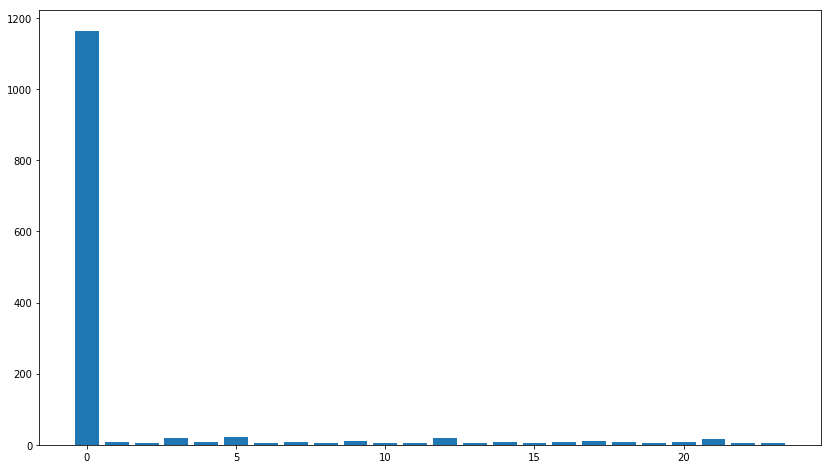

In [64]:
plt.figure(figsize=(14,8))
plt.bar(range(n_clusters), sizes)

In [65]:
for n in range(-1, n_clusters):
    print n, tags[tags['cluster'] == n].shape[0]

-1 323
0 1165
1 8
2 5
3 20
4 8
5 21
6 6
7 8
8 5
9 10
10 5
11 6
12 20
13 4
14 7
15 5
16 9
17 11
18 7
19 5
20 8
21 16
22 5
23 5


In [66]:
with open('output/test-3/1_step_tags_clusters.txt', 'w') as outfile:
    outfile.write('n_cluster\tdim\thashtags\n')
    for c in range(-1, n_clusters):
        cluster = tags[tags['cluster'] == c]
        dim = cluster.shape[0]
        if dim<100:
            outfile.write('{}\t{}\t{}\n'.format(c, dim, ','.join(list(cluster['id_node']))))
        else:
            outfile.write('{}\t{}\t{}\n'.format(c, dim, '/'))

In [55]:
# save also list of "noise" hashtags
tags[tags['cluster'] == -1]['id_node'].to_csv('output/test-3/1_step_noise_list.csv', index=None)

Try to extract user participation in these clusters as the percentage of tags used by each user that are contained in a specific cluster.

In [68]:
# extract list of tags for each user
path = 'data/test-3/'

# read input network
t_net = snap.LoadEdgeListNet(path+'hashtag_network.csv', '\t')

usedtags = {}

it = t_net.BegNI()
V = t_net.GetNodes()
for i in range(V):
    nid = it.GetId()
    type = t_net.GetStrAttrDatN(nid, 'type')
    username = t_net.GetStrAttrDatN(nid, 'content')

    if type == 'user':
        tagsV = snap.TIntV()
        snap.GetNodesAtHop(t_net, nid, 2, tagsV, True)
        
        taglist = []
        for tid in tagsV:
            tagname = t_net.GetStrAttrDatN(tid, 'content')
            taglist.append(tagname)
            
        usedtags[username] = set(taglist)
    it.Next()

In [70]:
# extract list of tags for each cluster
clusterTags = {}
for c in range(-1, n_clusters):
    cluster = tags[tags['cluster'] == c]
    clusterTags[c] = set(cluster['id_node'])

In [71]:
# compute participation of each user in each of the 30 cluster (plus the "noise cluster")
tempResult = []
for u in usedtags:
    u_vector = usedtags[u]
    
    if len(u_vector)>0:
        u_result = [u]
        for c in range(-1, n_clusters):
            c_vector = clusterTags[c]
            participation = float(len(u_vector.intersection(c_vector)))/len(u_vector)
            u_result.append(participation)
    else:
        u_result = [u]+[0 for i in range(-1, n_clusters)]
    tempResult.append(tuple(u_result))

In [72]:
result_header = ['username', 'noise']+[c for c in range(n_clusters)]
participationTable = pd.DataFrame(tempResult, columns=result_header)

In [73]:
participationTable.head()

,username,noise,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,martaferrari9008,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,rsersale,0.076923,0.884615,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.038462,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,tlashab,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,charr114,0.121622,0.810811,0.0,0.0,0.013514,0.0,0.0,0.040541,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,catespin,0.208333,0.750000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.041667,0.0,0.0,0.0


In [74]:
for i in range(1, n_clusters):
    print participationTable[participationTable[i] != 0.0].shape[0]

34
55
308
45
353
151
46
251
92
31
167
109
127
73
50
95
64
47
20
134
65
10
35


In [75]:
participationTable.to_csv('output/test-3/1_step_user_participation.csv', index=None)

### User participation analysis

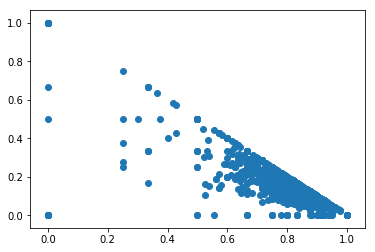

In [76]:
plt.scatter(participationTable[0], participationTable['noise'])

In [77]:
with open('output/test-3/1_step_user_groups.csv', 'w') as outfile:
    outfile.write('id_cluster\tnum_users\tlist_users\n')
    for i in range(1, n_clusters):
        group = participationTable[participationTable[i] != 0.0]
        group.sort_values(by=i, ascending = False, inplace=True)
        
        dim = group.shape[0]
        userlist = list(group.apply(lambda x: tuple((x['username'], x[i])), axis=1))
        outfile.write('{}\t{}\t{}\n'.format(i, dim, str(userlist).strip('[]')))

/home/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
